In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from interpret import show
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("heart_disease_uci.csv")
df = df.drop(['dataset'],axis=1)

In [3]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape

(920, 15)

In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


In [7]:
df.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df['chol'] = df['chol'].fillna(df['chol'].mean())
df['fbs'] = df['fbs'].fillna(df['fbs'].mean())
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

In [9]:
df.isnull().sum()

id            0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

In [10]:
df['restecg'] = df['restecg'].fillna(df['restecg'].value_counts().index[0])

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

<AxesSubplot:>

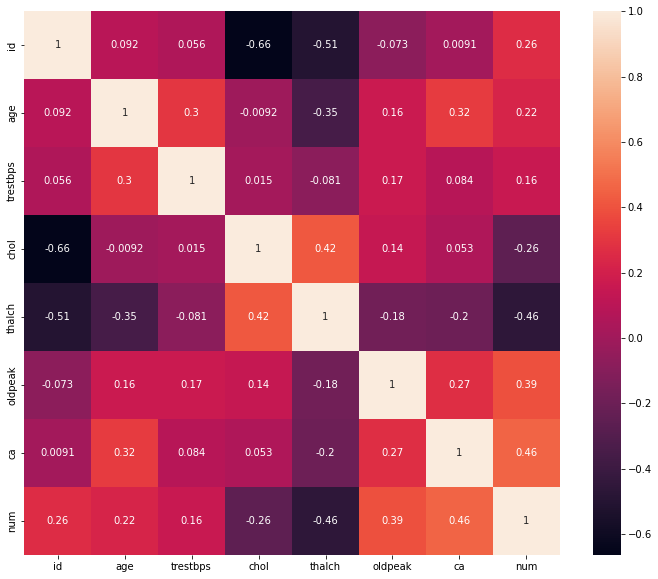

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
#data imbalance
xx = df['num'].value_counts()
xx

0    171
1     87
2     56
3     55
4     16
Name: num, dtype: int64

In [15]:
df.shape

(385, 15)

In [16]:
df.replace({'sex':{'Male':0,'Female':1}},inplace=True)
df.replace({'cp':{'typical angina':1,'atypical angina':2,'non-anginal':3,'asymptomatic':4}},inplace=True)
df.replace({'restecg':{'normal':0,'st-t abnormality':1,'lv hypertrophy':2}},inplace= True)
df.replace({'slope':{'upsloping':1,'flat':2,'downsloping':3}},inplace = True)
df.replace({'thal':{'normal':3,'fixed defect':6,'fixed defect':7}},inplace = True)

In [17]:
#feature selection
x = df.iloc[:,1:13].values
y = df.iloc[:,14].values

In [18]:
X_resampled, y_resampled = SMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

[(0, 171), (1, 171), (2, 171), (3, 171), (4, 171)]


In [19]:
df.shape

(385, 15)

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size= 0.2)


In [21]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC


In [22]:
models = []

models.append(('SVC', SVC(gamma ='auto', probability = True)))
models.append(('Decision Tree',DecisionTreeClassifier()))
models.append(('KNeighbors',KNeighborsClassifier()))
models.append(('GaussianNB',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
              


In [23]:
vot_hard = VotingClassifier(estimators = models, voting ='hard')
vot_hard.fit(x_train, y_train)
y_pred = vot_hard.predict(x_test)

In [24]:
score = accuracy_score(y_test, y_pred)*100
print("Hard Voting Score",score)
  

Hard Voting Score 76.60818713450293


In [25]:
from sklearn.metrics import accuracy_score
from tabulate import tabulate
data = []
for m in models:
    model = m[1]
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)*100
    data.append([m[0],acc])
    #print( m['modelName'],acc)
# create header
head = ["model","accuracy"]
 
# display table
print(tabulate(data, headers=head, tablefmt="grid"))

+---------------+------------+
| model         |   accuracy |
+===============+============+
| SVC           |    54.386  |
+---------------+------------+
| Decision Tree |    65.4971 |
+---------------+------------+
| KNeighbors    |    59.0643 |
+---------------+------------+
| GaussianNB    |    50.2924 |
+---------------+------------+
| Random Forest |    79.5322 |
+---------------+------------+


In [26]:
from interpret.blackbox import LimeTabular

In [27]:
feature_names = df.iloc[:,1:13].columns
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca'],
      dtype='object')

In [28]:

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
pred = model.predict(x_test)
lime = LimeTabular(predict_fn = model.predict_proba,data = x_train,random_state=1)
lime_local = lime.explain_local(x_test[-20:], 
                            y_test[-20:], 
                            name='LIME')
show(lime_local)

<!-- http://127.0.0.1:7135/2568938611248/ -->

In [29]:
model_svc = SVC(kernel = 'linear', C = 1)
model_svc.fit(x_train,y_train)
pred = model.predict(x_test)
lime = LimeTabular(predict_fn = model.predict_proba,data = x_train,random_state=1)
lime_local = lime.explain_local(x_test[-20:], 
                            y_test[-20:], 
                            name='LIME')

In [30]:
show(lime_local)

<!-- http://127.0.0.1:7135/2569006211440/ -->

In [31]:
import shap
from sklearn.metrics import f1_score,accuracy_score

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.8175427049730455
Accuracy 0.8245614035087719


In [33]:
exp = shap.TreeExplainer(rf)
shap_values = exp.shap_values(x_test[1:2])
x_test[1:2]
x_test.shape

(171, 12)

In [34]:
shap.initjs()
prediction = rf.predict(x_test[1:2])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(exp.expected_value[1],
                shap_values[1],
                x_test[1:2]) 

The RF predicted: 4


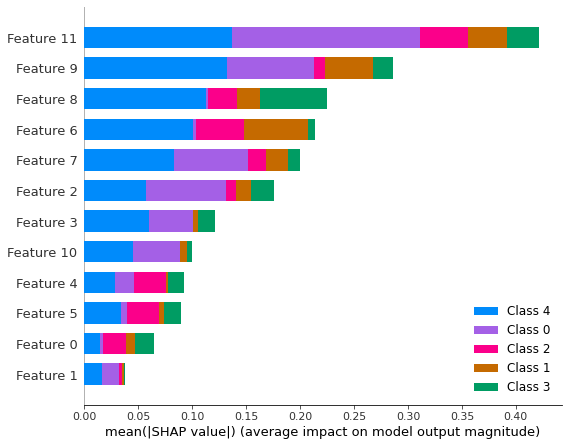

In [35]:
shap.summary_plot(shap_values, x_test)